# Métodos utilizados en el procesamiento de imágenes

Important Notes:

- OpenCV and Matplotlib expect different orders of the RGB channels
    - Matplotlib Orders: RED GREEN BLUE
    - OpenCV Orders: BLUE GREEN RED

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

## Read Data

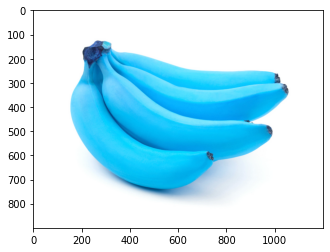

In [42]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
img = cv2.imread('../images/bananos.jpg')
type(img)
plt.imshow(img, cmap='gray');

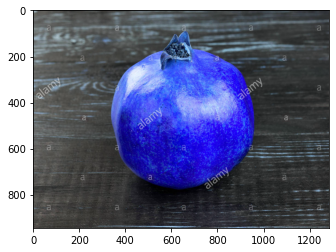

In [47]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
img2 = cv2.imread('../images/fruta.jpg')
type(img2)
plt.imshow(img2, cmap='gray');

# Segmentación de Objetos

## Create Mask

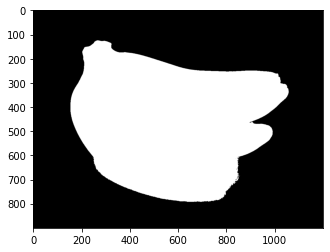

In [44]:
threshold = 240
# Paso la imagen a escala de grises
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# creo la máscara
mask = np.uint8((gray_img<threshold)*255)
plt.imshow(mask, cmap='gray');

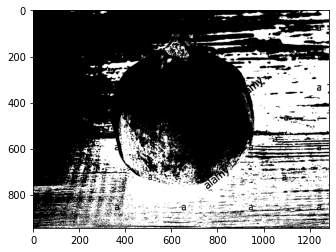

In [45]:
threshold = 60
# Paso la imagen a escala de grises
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask2 = np.uint8((gray_img2<threshold)*255)
plt.imshow(mask2, cmap='gray');

## ¿Cómo determinar el umbral para diferenciar el fondo del objeto?

- Algortimo OTSU

![img](../images/hist_background.png)

Método OTSU determina umbral en: 220.0


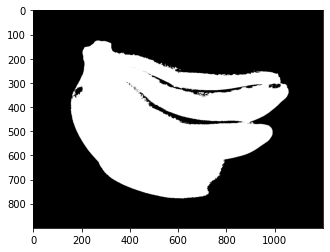

In [49]:
umbral,_ = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)
print('Método OTSU determina umbral en:',umbral)
mask = np.uint8((gray_img<umbral)*255)
plt.imshow(mask, cmap='gray');

Método OTSU determina umbral en: 100.0


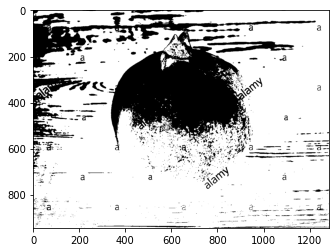

In [50]:
umbral,_ = cv2.threshold(gray_img2, 0, 255, cv2.THRESH_OTSU)
print('Método OTSU determina umbral en:',umbral)
mask2 = np.uint8((gray_img2<umbral)*255)
plt.imshow(mask2, cmap='gray');

Método OTSU determina umbral en: 102.0


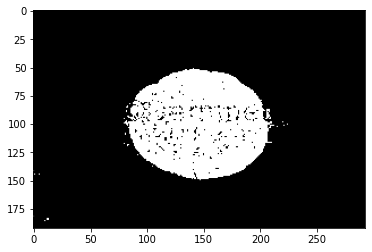

In [101]:
img3 = cv2.imread('../images/000078.jpg')
type(img3)
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
umbral,_ = cv2.threshold(gray_img3, 0, 255, cv2.THRESH_OTSU)
print('Método OTSU determina umbral en:',umbral)
mask3 = np.uint8((gray_img3<umbral)*255)
plt.imshow(mask3, cmap='gray');

Cantidad de Objetos detectados: 22


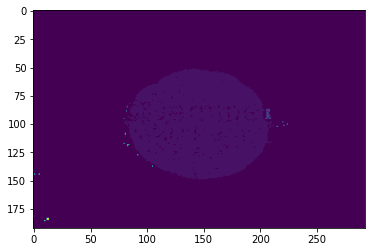

In [102]:
output = cv2.connectedComponentsWithStats(mask3, 4, cv2.CV_32S)
cantidad_objetos = output[0]
labels = output[1]
stats = output[2]
print('Cantidad de Objetos detectados:',cantidad_objetos)
plt.imshow(labels);

In [107]:
# Columna 4 es el numero de pixeles de cada objeto por lo tanto la primera fila es el fondo
stats

array([[    0,     0,   293,   192, 47273],
       [   80,    51,   133,    99,  8930],
       [   85,    82,     1,     1,     1],
       [   82,    84,     2,     2,     3],
       [  205,    87,     5,     9,    25],
       [   82,    88,     1,     2,     2],
       [   80,    95,     1,     1,     1],
       [  220,    98,     1,     1,     1],
       [  221,   101,     1,     1,     1],
       [  224,   100,     1,     1,     1],
       [  215,   102,     1,     1,     1],
       [   81,   108,     1,     2,     2],
       [   80,   117,     1,     1,     1],
       [   83,   118,     2,     2,     3],
       [   92,   127,     1,     1,     1],
       [  105,   137,     1,     1,     1],
       [    0,   141,     1,     1,     1],
       [    1,   144,     1,     1,     1],
       [    5,   144,     1,     1,     1],
       [    0,   181,     1,     1,     1],
       [   12,   183,     2,     2,     4],
       [   10,   185,     1,     1,     1]], dtype=int32)

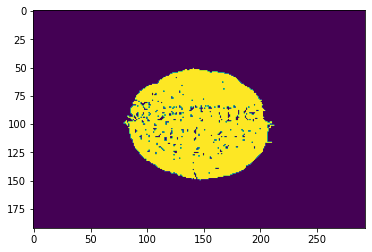

In [114]:
mascara = (np.argmax(stats[:,4][1:])+1==labels)
plt.imshow(mascara);

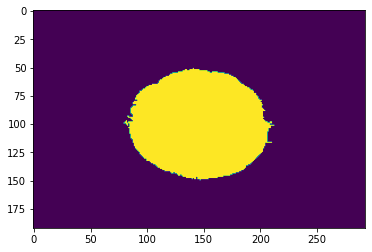

In [118]:
# ¿Cómo rellenar huecos?
from scipy import ndimage
new_mascara = ndimage.binary_fill_holes(mascara).astype(int)
plt.imshow(new_mascara);